In [4]:
!conda install -y nltk 

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import collections
import nltk
import networkx as nx
import xlsxwriter
import matplotlib
%matplotlib inline

In [6]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
    with open('data/dataset.txt') as file_:
        songs = file_.readlines()
    lines = []
    for song in songs:
        song = song.strip()
        title, author, lyrics = song.split('\t')
        lines.append({"title":title, "author":author,"lyrics":lyrics.replace("\\","\n")})
        

In [15]:
lines[0].keys()

dict_keys(['title', 'author', 'lyrics', 'tokens', 'counts'])

In [9]:
type(lines[0])

dict

In [12]:
lines[0]["lyrics"]

"Our life together is so precious together,\nWe have grown - we have grown,\nAlthough our love is still special,\nLet's take our chance and fly away somewhere alone,\nIt's been so long since we took the time,\nNo-one's to blame,\nI know time flies so quikly,\nBut when I see you darling,\nIt's like we both are falling in love again,\nIt'll be just like starting over - starting over,\nEveryday we used to make it love,\nWhy can't we be making love nice and easy,\nIt's time to spread our wing's and fly,\nDon't let another day go by my love,\nIt'll be just like starting over - starting over,\nWhy don't we take off alone,\nTake a trip far, far away,\nWe'll be together on our own again,\nLike we used to in the early days,\nWell, well, well darling,\nIt's been so long since we took the time,\nNo-one's to blame,\nI know time flies so quikly,\nBut when I see you darling,\nIt's like we both are falling in love again,\nIt'll be just like starting over - starting over,\nEveryday we used to make it 

In [4]:
lines[0]["title"]

'(Just Like) Starting Over'

In [13]:
# tokenize

stop_words = set(nltk.corpus.stopwords.words('english'))

for indx, line in enumerate(lines):
 
    lines[indx]["tokens"] = nltk.word_tokenize(line["lyrics"].lower())
    # only alfanum
    lines[indx]["tokens"] = [word for word in lines[indx]["tokens"] if word.isalnum()]

    # remove stop wrord
    lines[indx]["tokens"] = [word for word in lines[indx]["tokens"] if not word in stop_words] 

    #counts = dict()
    #for size in 1, 2, 3: # count frequency, bigrams and trigrams
    #    counts[size] = FreqDist(ngrams(lines[0]["tokens"], size))
    counts = nltk.FreqDist(lines[indx]["tokens"])
    
    lines[indx]["counts"] = counts

    


In [16]:
lines[0]["tokens"]

['life',
 'together',
 'precious',
 'together',
 'grown',
 'grown',
 'although',
 'love',
 'still',
 'special',
 'let',
 'take',
 'chance',
 'fly',
 'away',
 'somewhere',
 'alone',
 'long',
 'since',
 'took',
 'time',
 'blame',
 'know',
 'time',
 'flies',
 'quikly',
 'see',
 'darling',
 'like',
 'falling',
 'love',
 'like',
 'starting',
 'starting',
 'everyday',
 'used',
 'make',
 'love',
 'ca',
 'making',
 'love',
 'nice',
 'easy',
 'time',
 'spread',
 'wing',
 'fly',
 'let',
 'another',
 'day',
 'go',
 'love',
 'like',
 'starting',
 'starting',
 'take',
 'alone',
 'take',
 'trip',
 'far',
 'far',
 'away',
 'together',
 'like',
 'used',
 'early',
 'days',
 'well',
 'well',
 'well',
 'darling',
 'long',
 'since',
 'took',
 'time',
 'blame',
 'know',
 'time',
 'flies',
 'quikly',
 'see',
 'darling',
 'like',
 'falling',
 'love',
 'like',
 'starting',
 'starting',
 'everyday',
 'used',
 'make',
 'love',
 'ca',
 'making',
 'love',
 'nice',
 'easy',
 'time',
 'spread',
 'wing',
 'fly',
 'l

In [17]:
lines[0]["counts"]

FreqDist({'love': 10, 'starting': 8, 'like': 7, 'time': 6, 'together': 5, 'grown': 4, 'let': 4, 'take': 4, 'fly': 4, 'away': 3, ...})

In [18]:
lines[0]["counts"].most_common(5)


[('love', 10), ('starting', 8), ('like', 7), ('time', 6), ('together', 5)]

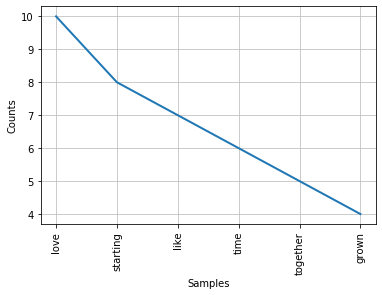

In [19]:
lines[0]["counts"].plot(6)

In [20]:
lines[5]["counts"].most_common(5)

[('nothing', 12), ('gon', 12), ('na', 12), ('change', 12), ('world', 12)]

In [21]:
lines[0]["counts"].N()

126

In [22]:
# create Lars magne table
# word counter song

lmtablesheet = {}
lmtablesheet["sheet1"] = []
lmtablesheet["sheet2"] = []

# Sheet number 1
lmtablesheet["sheet1"].append(["id","Name"])

for indx, line in enumerate(lines):
    lmtablesheet["sheet1"].append([indx,line["title"]])





In [24]:
# sheet number 2

lmtablesheet["sheet2"].append(["Source","Target","Type","Weigth"])

# adding a connect if both songs contains a word
for indx1,song1 in  enumerate(lines):
    for i in song1["counts"]:
        if song1["counts"][i] > 4: # must be mentioned more than this
            for indx2,song2 in  enumerate(lines):
                for j in song2["counts"]:
                    if song2["counts"][j] > 4: # must be mentioned more than this
                        if (j == i) and (indx1 != indx2): # found both places
                            lmtablesheet["sheet2"].append([indx1,indx2,"Undirected",song1["counts"][i]*song2["counts"][j]])
                            

                           

In [31]:

workbook = xlsxwriter.Workbook('data/songs.xlsx')
worksheet1 = workbook.add_worksheet()
worksheet2 = workbook.add_worksheet()

# Start from the first cell. Rows and columns are zero indexed.
row = 0
col = 0
for [id,name] in lmtablesheet["sheet1"]:
    worksheet1.write(row, col,     id)
    worksheet1.write(row, col + 1, name)
    row += 1
    

row = 0
col = 0
for [source,target,types,weigth] in lmtablesheet["sheet2"]:
    worksheet2.write(row, col,  source   )
    worksheet2.write(row, col + 1, target)
    worksheet2.write(row, col + 2, types)
    worksheet2.write(row, col + 3, weigth)
    row += 1 



workbook.close()

# Write each dataframe to a different worksheet.


# Close the Pandas Excel writer and output the Excel file.
#writer.save()

In [32]:


# another type of table
lmtable = []
for song in lines:
    for j in song["counts"]:
        
        lmtable.append({"word":j, "count":song["counts"][j], "title":song["title"]})


In [33]:
lmtable[0:10]

[{'word': 'life', 'count': 2, 'title': '(Just Like) Starting Over'},
 {'word': 'together', 'count': 5, 'title': '(Just Like) Starting Over'},
 {'word': 'precious', 'count': 2, 'title': '(Just Like) Starting Over'},
 {'word': 'grown', 'count': 4, 'title': '(Just Like) Starting Over'},
 {'word': 'although', 'count': 2, 'title': '(Just Like) Starting Over'},
 {'word': 'love', 'count': 10, 'title': '(Just Like) Starting Over'},
 {'word': 'still', 'count': 2, 'title': '(Just Like) Starting Over'},
 {'word': 'special', 'count': 2, 'title': '(Just Like) Starting Over'},
 {'word': 'let', 'count': 4, 'title': '(Just Like) Starting Over'},
 {'word': 'take', 'count': 4, 'title': '(Just Like) Starting Over'}]

In [34]:
G = nx.Graph()
# adding all songs as nodes
for song in lines:
    G.add_node(song["title"])


# adding a connect if both songs contains a word
for song1 in lines:
    for i in song1["counts"]:
        if song1["counts"][i] > 4: # must be mentioned more than this
            for song2 in lines:
                for j in song2["counts"]:
                    if song2["counts"][j] > 2: # must be mentioned more than this
                        if j == i: # found both places
                            G.add_edge(song1["title"],song2["title"])
    





In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

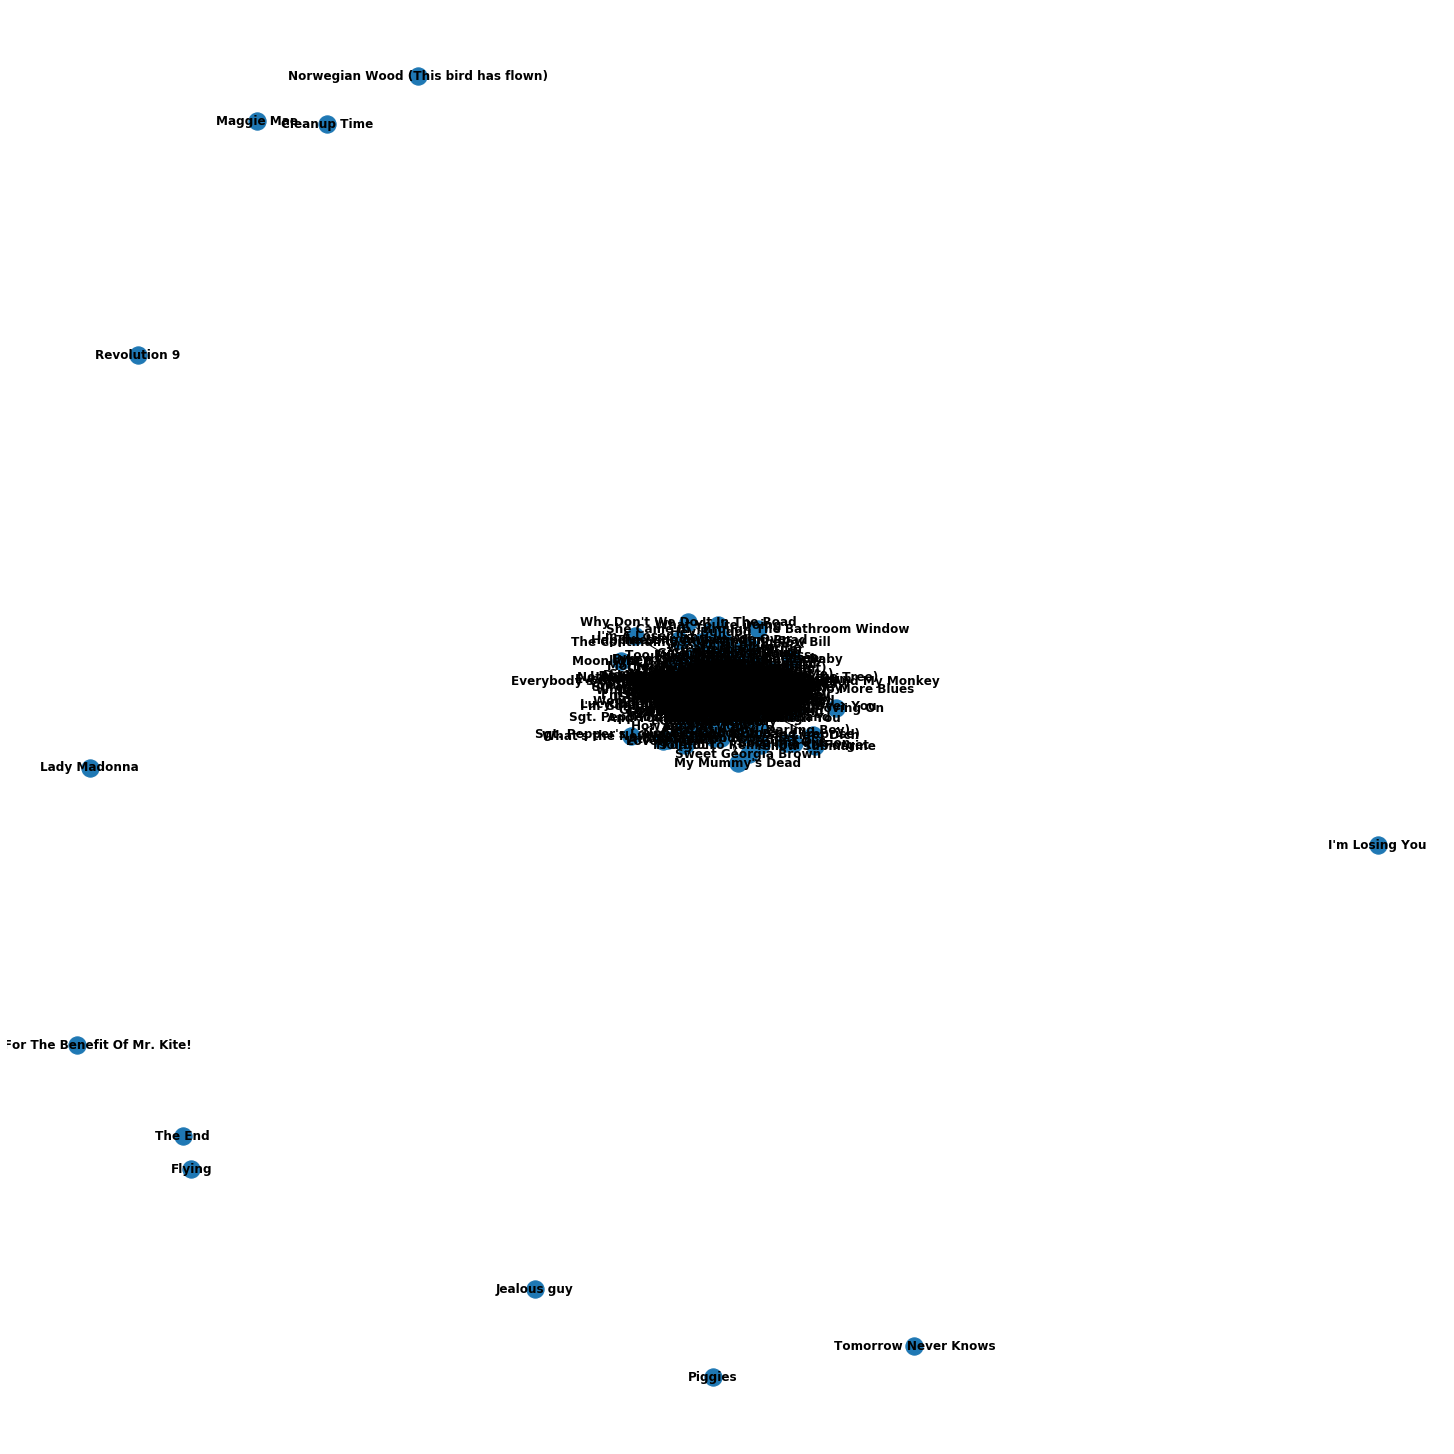

In [36]:
nx.draw(G, with_labels=True, font_weight='bold') 

In [37]:
# list non-connected nodes
list(nx.isolates(G))

['Being For The Benefit Of Mr. Kite!',
 'Cleanup Time',
 'Flying',
 'Jealous guy',
 'Lady Madonna',
 'Maggie Mae',
 'Norwegian Wood (This bird has flown)',
 'Revolution 9',
 'The End',
 'Tomorrow Never Knows']